## Neural Network From Scratch
### Wyatt Cupp
### <wyattcupp@gmail.com>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


%matplotlib inline

### Plotting Utils

In [2]:
def plot_cost(cost_iterator, name=None): #TODO: enhance
    plt.plot(range(len(cost_iter)), cost_iter, label='y')
    plt.xlabel('$x$', fontsize=15)
    plt.ylabel('$cost$', fontsize=15)
    
    if name is not None:
        title = name + ': iteration (x) vs cost(y)'
    else:
        title = 'iteration(x) vs cost (y)'
        
    plt.title(title)
    plt.grid()
    plt.legend(loc=2)
    plt.show()

### Using the MLP for XOR

In [3]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
Y = np.array([ [0],
               [1],
               [1],
               [0]])

X.shape, Y.shape

((4, 2), (4, 1))

In [4]:
from mlp import *
from activations import *

model = MultiLayerPerceptron([DenseLayer(2, activation=Sigmoid(), input_shape=2), # 1 hidden layer w/ 2 neurons
                             DenseLayer(1, activation=Sigmoid())],loss=MSE(), verbose=True) # 1 output layer w/ 1 neuron  

cost_iter = model.train(X, Y,lr=1,epochs=3000)

print('\nAccuracy: {}'.format(accuracy_score(model.predict(X), Y)))

Beginning training ...
Layer 0 weights shape: (2, 2)
Layer 1 weights shape: (2, 1)
Learning Rate: 1, batch size: 32, epochs: 3000
-----------------------------------------------------

Cost after epoch #0: 0.4997880969910532
Cost after epoch #100: 0.49762380536704093
Cost after epoch #200: 0.4805830401345368
Cost after epoch #300: 0.4108646509626086
Cost after epoch #400: 0.3305458544454653
Cost after epoch #500: 0.13061878336616817
Cost after epoch #600: 0.03759840691697504
Cost after epoch #700: 0.018878204848487207
Cost after epoch #800: 0.012126605305179573
Cost after epoch #900: 0.008792756769853149
Cost after epoch #1000: 0.006840834097770213
Cost after epoch #1100: 0.005571138645751483
Cost after epoch #1200: 0.00468427834704541
Cost after epoch #1300: 0.004032248336548099
Cost after epoch #1400: 0.003533999209714286
Cost after epoch #1500: 0.003141625969446335
Cost after epoch #1600: 0.002825087875915581
Cost after epoch #1700: 0.0025646357874168305
Cost after epoch #1800: 0.00

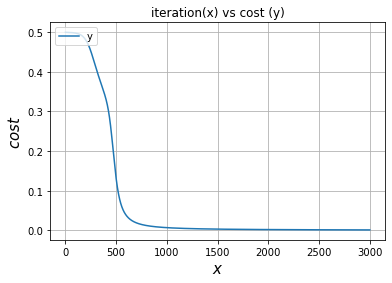

In [5]:
plot_cost(cost_iter)

In [6]:
from mlp import *
from activations import *

#TODO: why does the cost stop dropping??????
model = MultiLayerPerceptron([DenseLayer(2, activation=TanH(), input_shape=2), # 1 hidden layer w/ 2 neurons
                             DenseLayer(1, activation=Sigmoid())],loss=MSE(), verbose=True) # 1 output layer w/ 1 neuron  

cost_iter = model.train(X, Y,lr=0.2,epochs=1000)

print('\nAccuracy: {}'.format(accuracy_score(model.predict(X), Y))) #TODO: WHY IS THIS NOT LEARNING CONSISTENTLY?

Beginning training ...
Layer 0 weights shape: (2, 2)
Layer 1 weights shape: (2, 1)
Learning Rate: 0.2, batch size: 32, epochs: 1000
-----------------------------------------------------

Cost after epoch #0: 0.5059703161258782
Cost after epoch #100: 0.4988771213122233
Cost after epoch #200: 0.48757228171433725
Cost after epoch #300: 0.3942554852149393
Cost after epoch #400: 0.13855695508171578
Cost after epoch #500: 0.05256881632438441
Cost after epoch #600: 0.028842734459160115
Cost after epoch #700: 0.019124070949902136
Cost after epoch #800: 0.014063637700374302
Cost after epoch #900: 0.011021247251004496

Accuracy: 1.0


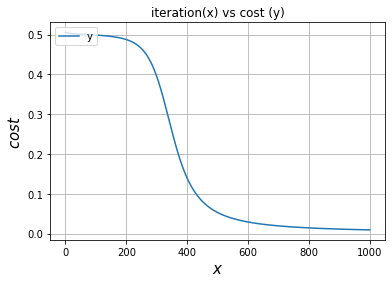

In [7]:
plot_cost(cost_iter)

### Try on the Iris Dataset

In [8]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

data = datasets.load_iris()
print(len(data.data))
X = data.data[:300]
y = data.target[:300]
encoder.fit(y.reshape(-1,1))
y_new = encoder.transform(y.reshape(-1,1)).toarray()

X.shape, y_new.shape

150


((150, 4), (150, 3))

Check accuracy with our trained model on the iris dataset: 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

data = datasets.load_iris()
X = data.data
y = data.target
encoder.fit(y.reshape(-1,1))

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=0)

# transform y_train into correct shape for categorical data labels
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()

X_train.shape, y_train.shape

((120, 4), (120, 3))

In [10]:
from mlp import *
from activations import *
#TODO: why does the cost stop dropping????
model = MultiLayerPerceptron([DenseLayer(10, activation=Relu(), input_shape=4), # hidden 1
                             DenseLayer(10, activation=Relu()), # hidden 2
                             DenseLayer(3, activation=SoftMax())],loss=CrossEntropy(), verbose=True) # 1 output layer w/ 3 neuron  

cost_iter = model.train(X_train, y_train,lr=0.001,epochs=5000)

Beginning training ...
Layer 0 weights shape: (4, 10)
Layer 1 weights shape: (10, 10)
Layer 2 weights shape: (10, 3)
Learning Rate: 0.001, batch size: 32, epochs: 5000
-----------------------------------------------------

Cost after epoch #0: 0.6243832490495227
Cost after epoch #100: 0.15912715780986508
Cost after epoch #200: 0.127562543123071
Cost after epoch #300: 0.12464745458527816
Cost after epoch #400: 0.12020984737141736
Cost after epoch #500: 0.11853818988970108
Cost after epoch #600: 0.116747746044263
Cost after epoch #700: 0.11446182936324514
Cost after epoch #800: 0.11178503421225233
Cost after epoch #900: 0.10897536497357604
Cost after epoch #1000: 0.10625174654999694
Cost after epoch #1100: 0.10364066295031088
Cost after epoch #1200: 0.10102714783634922
Cost after epoch #1300: 0.0987064967970222
Cost after epoch #1400: 0.09644433750051719
Cost after epoch #1500: 0.09435435374751831
Cost after epoch #1600: 0.09241066416315316
Cost after epoch #1700: 0.09052684778778317
Cos

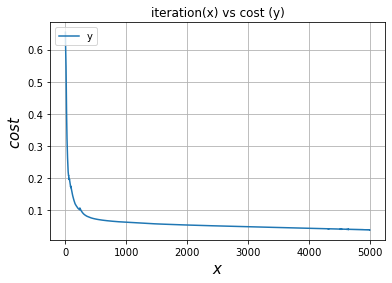

In [11]:
plot_cost(cost_iter)

In [12]:
model.accuracy(X_test,y_test)

1.0

In [13]:
preds = model.predict(X_test)
print(preds[:5], y_test[:5])

[2 1 0 2 0] [2 1 0 2 0]


In [14]:
from mlp import *
from activations import *
#TODO: why does the cost stop dropping????
model = MultiLayerPerceptron([DenseLayer(10, activation=Relu(), input_shape=4), # hidden 1
                             DenseLayer(10, activation=Relu()), # hidden 2
                             DenseLayer(3, activation=SoftMax())],loss=CrossEntropy(), verbose=True) # 1 output layer w/ 3 neuron  

cost_iter = model.train(X_train, y_train,lr=0.001,epochs=5000)

Beginning training ...
Layer 0 weights shape: (4, 10)
Layer 1 weights shape: (10, 10)
Layer 2 weights shape: (10, 3)
Learning Rate: 0.001, batch size: 32, epochs: 5000
-----------------------------------------------------

Cost after epoch #0: 0.6330843844679527
Cost after epoch #100: 0.16933549719434537
Cost after epoch #200: 0.12324354924604469
Cost after epoch #300: 0.11448674201435877
Cost after epoch #400: 0.11482778116982989
Cost after epoch #500: 0.11461699009767926
Cost after epoch #600: 0.11296928694653907
Cost after epoch #700: 0.11060291663267471
Cost after epoch #800: 0.10799940093010342
Cost after epoch #900: 0.10537783499287115
Cost after epoch #1000: 0.1027550961152493
Cost after epoch #1100: 0.10028908091079668
Cost after epoch #1200: 0.09797761847483105
Cost after epoch #1300: 0.09582713057632097
Cost after epoch #1400: 0.09381139231504397
Cost after epoch #1500: 0.09193546600517954
Cost after epoch #1600: 0.09021225100582433
Cost after epoch #1700: 0.08861665141359408

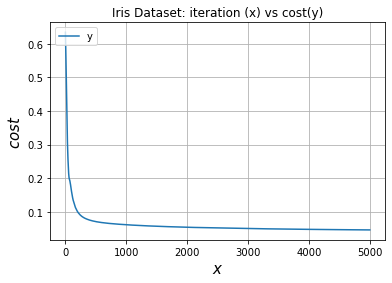

In [15]:
plot_cost(cost_iter, name='Iris Dataset')

In [16]:
model.accuracy(X_test,y_test)

0.9666666666666667

### Digits Dataset

In [22]:
data = datasets.load_digits()

X = data.data
y = data.target

print(X.shape, y.shape)

encoder = OneHotEncoder()

encoder.fit(y.reshape(-1,1))

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=0)

# transform y_train into correct shape for categorical data labels
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()

X_train.shape, y_train.shape

(1797, 64) (1797,)


((1437, 64), (1437, 10))

In [ ]:
# Build the model object
from mlp import *
model = MultiLayerPerceptron([DenseLayer(512, activation=LeakyRelu(), input_shape=X_train.shape[1]), # hidden 1
                             DenseLayer(512, activation=LeakyRelu()), # hidden 2
                             DenseLayer(512, activation=LeakyRelu()),
                             DenseLayer(512, activation=LeakyRelu()),
                             DenseLayer(10, activation=SoftMax())],loss=CrossEntropy(), verbose=True) # 1 output layer w/ 3 neuron  

cost_iter = model.train(X_train, y_train,lr=0.1,epochs=2000)

Beginning training ...
Layer 0 weights shape: (64, 512)
Layer 1 weights shape: (512, 512)
Layer 2 weights shape: (512, 512)
Layer 3 weights shape: (512, 512)
Layer 4 weights shape: (512, 10)
Learning Rate: 0.1, epochs: 2000
---------------------------------------

Cost after epoch #0: 4.573412222386096
Cost after epoch #100: 4.573412222386096
Cost after epoch #200: 4.573412222386096
Cost after epoch #300: 4.573412222386096
Cost after epoch #400: 4.573412222386096


### Implementing Gradient Descent with Linear Regression (sanity check)

In [19]:
def f(x): return x * 2

X = np.random.uniform(0, 1, 50)
noise_variance = 0.2  # Variance of the gaussian noise
noise = np.random.randn(X.shape[0]) * noise_variance
y = f(X) + noise

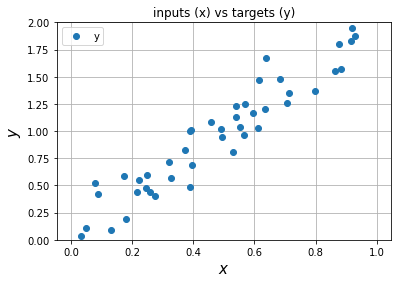

((50,), (50,))

In [20]:
plt.plot(X, y, 'o', label='y')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.show()
X.shape,y.shape

In [21]:
m = 0
b = 0
lr = 0.01
epochs = 5000
n = len(X)
 
def mse_cost(y,y_hat):
    assert(len(y)==len(y_hat))
    return np.sum((y-y_hat)**2)/float(len(y))

cost_iter = []
# Perform Gradient Descent
for i in range(epochs):
    y_hat = m*X + b  # The current predicted value of Y
    
    cost = mse_cost(y,y_hat)
    cost_iter.append(cost)
    if i % 100 == 0:
        print('Current cost: {}'.format(cost))
    
    Dm = (-2/n) * np.sum(X * (y - y_hat))  # Derivative wrt m
    Dc = (-2/n) * np.sum(y - y_hat)  # Derivative wrt c
    m = m - lr * Dm  # Update m
    b = b - lr * Dc  # Update c
       
print (m, b)

Current cost: 1.2151676381347742
Current cost: 0.20996286181874393
Current cost: 0.1613785537136866
Current cost: 0.12938766550008057
Current cost: 0.10506198541844343
Current cost: 0.0865385523958006
Current cost: 0.07243320986840365
Current cost: 0.06169218192905158
Current cost: 0.05351303412767966
Current cost: 0.047284723472955016
Current cost: 0.04254194897446101
Current cost: 0.038930390208280735
Current cost: 0.03618023695395347
Current cost: 0.03408603237029493
Current cost: 0.03249132384584615
Current cost: 0.03127697482866129
Current cost: 0.030352264442449796
Current cost: 0.029648109964398914
Current cost: 0.02911190583351366
Current cost: 0.028703593625126825
Current cost: 0.028392669389533078
Current cost: 0.028155904780751233
Current cost: 0.027975611726835457
Current cost: 0.027838320999739388
Current cost: 0.027733775964103254
Current cost: 0.027654166330537047
Current cost: 0.027593544669087686
Current cost: 0.027547382092119824
Current cost: 0.027512229912826747
Cur

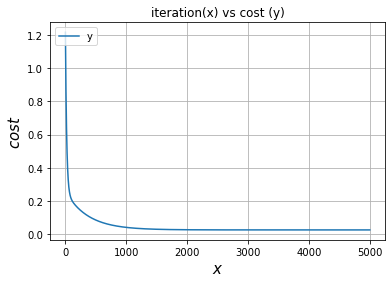

In [22]:
plot_cost(cost_iter)

### Plot Fitted Linear Regression Line

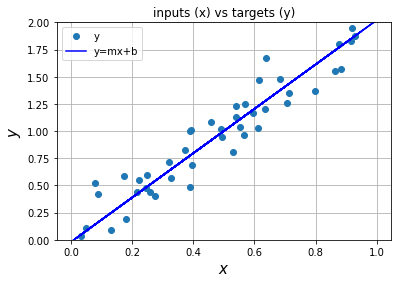

((50,), (50,))

In [23]:
plt.plot(X, y, 'o', label='y')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

# plot new regression line w/ new weights:
y_pred = X*m+b
plt.plot(X,y_pred, label='y=mx+b', c='b')

plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.show()
X.shape,y.shape